# Flat Fielding with Bias Correction

In this notebook, we extract the flat flux from the relevant files; such files are the ones with the data product type designeted as 'LIGHT LIGHT TUN', meaning that the CCD in those frames is illuminated with tungsten lamp, meaning uniform illumination across the CCD. The idea is that we can now measure the flux in each pixels to find the pixel response to the uniform light. Since one provides the uniform illumination such frames are called the 'flats'. We, later, want to correct our science images for the flats: the idea to do this is to make the pixel response to the light uniform over the CCD.

We first want to list all of the flat files, then we identify the 104th order and the bias region. Below, we make a list of all flat files and visualize one of them. We first work on this single flat file and then shall generalise the process for all of the flat files.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as clr
from astropy.io import fits
from scipy.optimize import curve_fit as cft
import os
import utils as utl
import order_id as oid

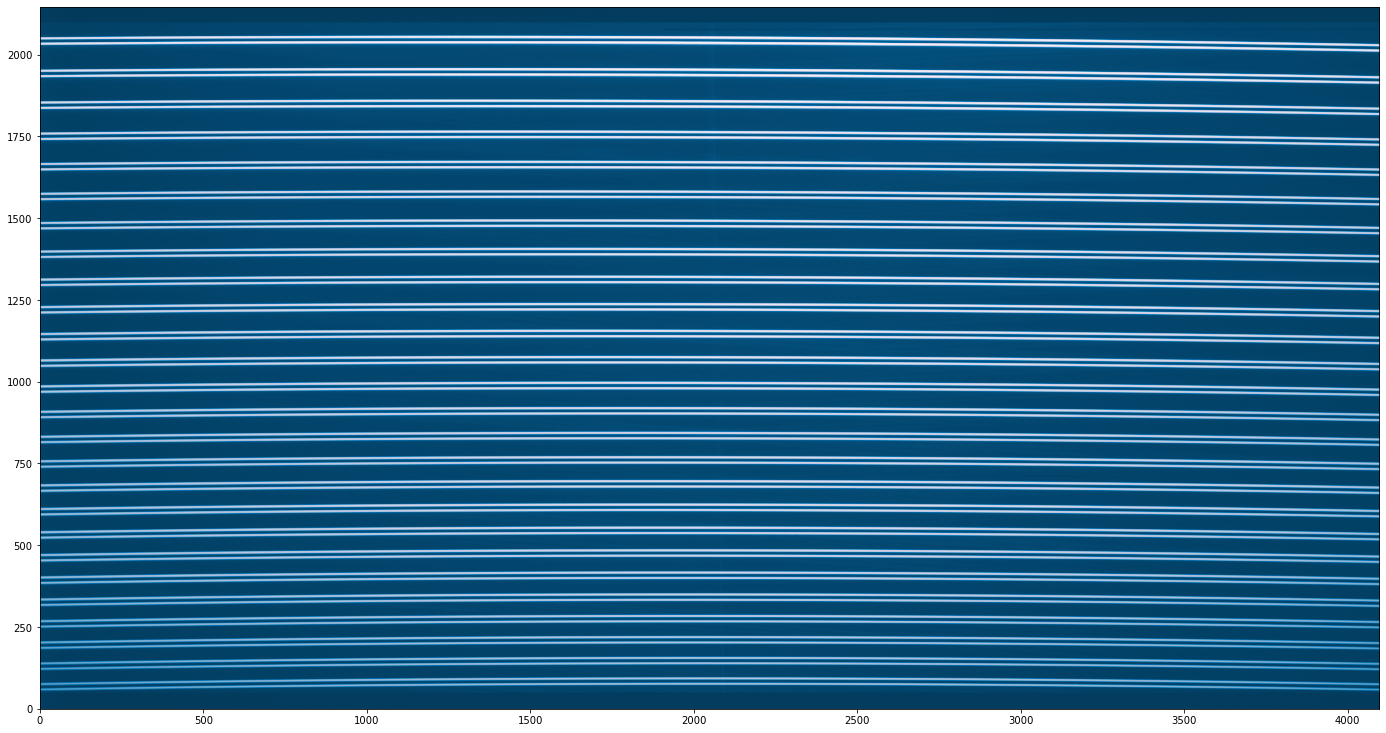

In [2]:
p1 = os.getcwd() + '/Spectro-Module/raw/'
list_all = os.listdir(p1)
list_flat = np.array([])

for i in range(len(list_all)):
    hdul = fits.open(p1 + list_all[i])
    h11 = hdul[0].header
    if h11['HIERARCH ESO DPR TYPE'] == 'LAMP,LAMP,TUN':
        list_flat = np.hstack((list_flat, list_all[i]))

fla1 = fits.open(p1 + list_flat[0])
fla2 = fla1[2].data
fla3 = np.transpose(fla2)
plt.figure(figsize=(16*1.5, 9*1.5))
plt.imshow(fla3, origin='lower', norm=clr.LogNorm(),cmap='PuBu_r')

## Bias and Read noise estimation

The top 50 rows (top in the sense that edge towards higher orders) in above image represents the overscan region, meaning the region which is not exposed to the light. We use this 50 rows to estimate the bias (mean value of counts in these pixels) and read noise (scatter of counts). We first extract the data in these 50 rows, flatten the data and find the mean and the standard deviation of them. We also visualise this region.

(50, 4096)


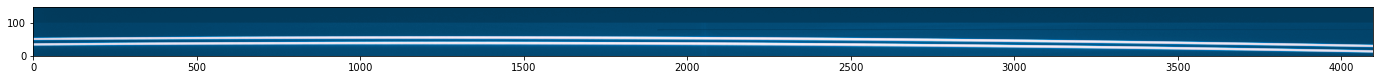

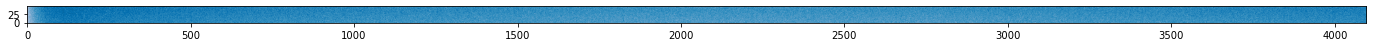

In [26]:
bias_data1 = fla3[1998:]
bias_data = fla3[2098:]

plt.figure(figsize=(16*1.5, 9*1.5))
plt.imshow(bias_data1, origin='lower', norm=clr.LogNorm(),cmap='PuBu_r')
plt.show()
plt.figure(figsize=(16*1.5, 9*1.5))
plt.imshow(bias_data, origin='lower', norm=clr.LogNorm(),cmap='PuBu_r')

In above figure, one can see the last order and the darker region towards the edges. This 'darker' region is nothing but the overscan region, from which we want to find the mean and scatter in the data. Which we do below. The overscan region only is shown in the second figure above. One thing to remember is that what we will count from these data would be ADU, which we want to convert into units of 'electrons' using the conversion factor 1.42 e-/ADU.

In [28]:
bias_data2 = np.ndarray.flatten(bias_data)
bias_0 = np.mean(bias_data2)*1.42
std_0 = np.std(bias_data2)*1.42

print('Bias and Read noise:')
print('--------------------')
print('Bias is: ' + str(bias_0) + ' e-')
print('Read noise is: ' + str(std_0) + ' -e')

Bias and Read noise:
--------------------
Bias is: 270.10482158203126 e-
Read noise is: 5.836710876166139 -e
